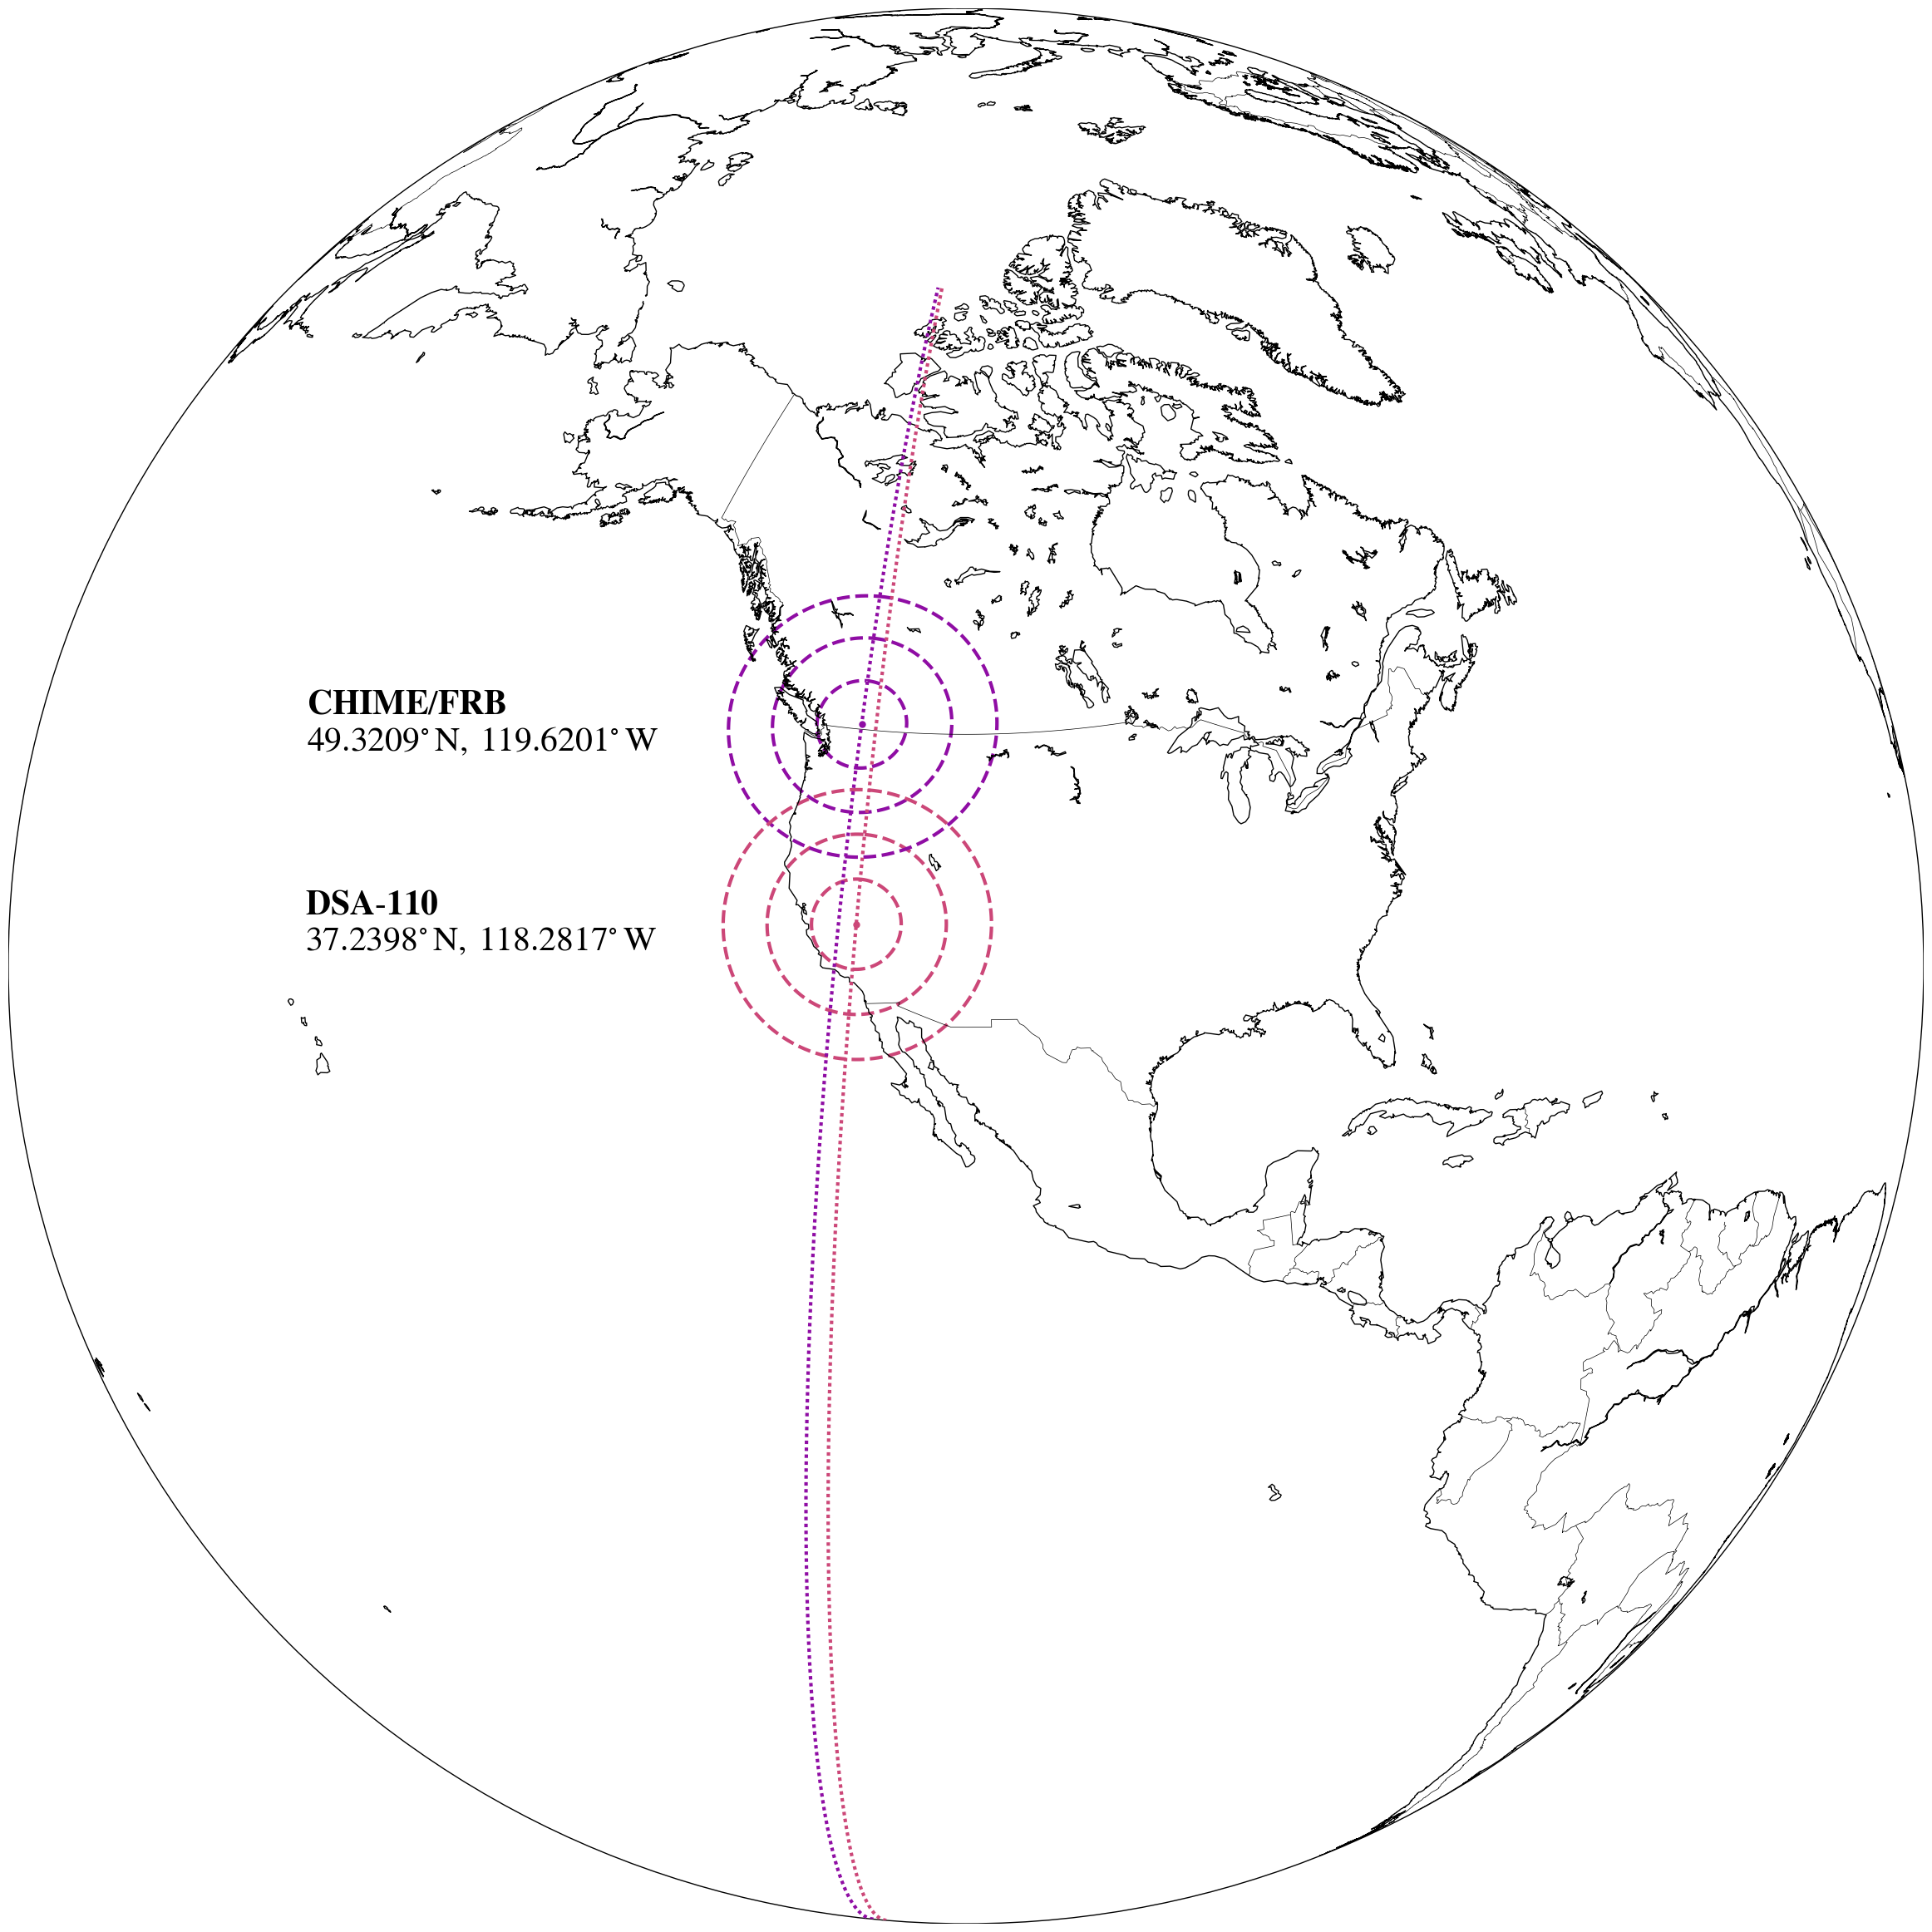

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['STIXGeneral', 'DejaVu Serif'],
    'mathtext.fontset': 'stix',
    'font.size': 50,
    'axes.unicode_minus': True,
})

# Coordinates (decimal degrees)
drao_lat, drao_lon = 49.32154722, -119.61999722   # CHIME/FRB @ DRAO
ovro_lat, ovro_lon = 37.23165278, -118.27704722   # DSA‑110 @ OVRO

# Latitude difference
lat_diff = abs(drao_lat - ovro_lat)
lon_diff = abs(drao_lon - ovro_lon)

# Make an orthographic (“globe”) projection centred on North America
fig, ax = plt.subplots(figsize=(24, 24))      # instead of fig = plt.figure(…)

m = Basemap(projection='ortho', lat_0=35, lon_0=-110,
            resolution='l', ax=ax)  

#m.drawparallels([70], color='k', linewidth=5, linestyle='--')


colors = plt.get_cmap('plasma')(np.linspace(0.3, 0.7, 3))

# Coastlines / country outlines
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=0.5)

# Radii for concentric circles (in km)
radii_km = [300, 600, 900]
# helper: km → degrees  (≈1° latitude = 111 km)
km2deg = lambda km: km / 111.0

for r in radii_km:
    r_deg = km2deg(r)
    m.tissot(drao_lon, drao_lat, r_deg, npts=180,
             facecolor='none', edgecolor=colors[0],  linewidth=3, linestyle='--')
    m.tissot(ovro_lon, ovro_lat, r_deg, npts=180,
             facecolor='none', edgecolor=colors[1], linewidth=3, linestyle='--')

# Plot the two telescope sites (different markers, default colour)
x_drao, y_drao = m(drao_lon, drao_lat)
x_ovro, y_ovro = m(ovro_lon, ovro_lat)

m.plot(x_drao, y_drao, marker='.',  markersize=10, linestyle='', c=colors[0])   # CHIME/FRB
m.plot(x_ovro, y_ovro, marker='.', markersize=10, linestyle='', c=colors[1])   # DSA‑110



m.drawmeridians([drao_lon], color=colors[0],  linewidth=3)
m.drawmeridians([ovro_lon], color=colors[1], linewidth=3)



# Annotations: name + latitude
ax.text(x_drao - 0.65*x_drao, y_drao,
        r'$\mathbf{CHIME}/\mathbf{FRB}$' '\n'
        r'$49.3209^{\circ}\,\mathrm{N},\;119.6201^{\circ}\,\mathrm{W}$',
        fontsize=30, ha='left', va='center')
                                                                                                                                                      #{drao_lon:.2f}°N', fontsize=35)
ax.text(x_ovro - 0.65*x_ovro, y_ovro,
        r'$\mathbf{DSA}\text{-}\mathbf{110}$' '\n'
        r'$37.2398^{\circ}\,\mathrm{N},\;118.2817^{\circ}\,\mathrm{W}$',
        fontsize=30, ha='left', va='center')
# Title shows the latitude offset
#plt.title(f'Longitude difference: {lon_diff:.2f}°')

#plt.tight_layout()
fig.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)

#fig.savefig('chimedsa_earthmap.png', dpi=300, bbox_inches='standard')

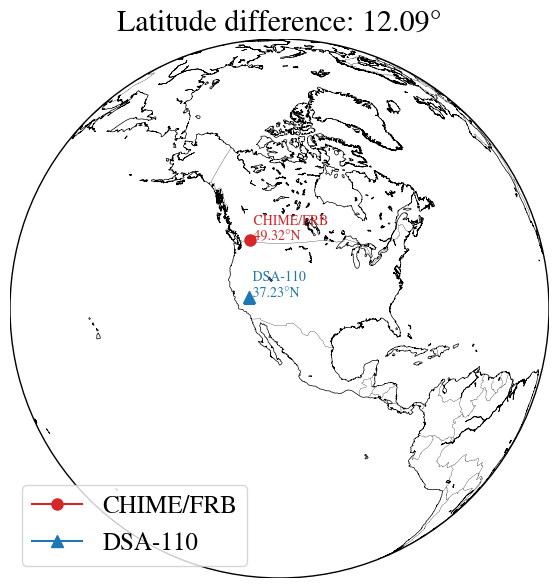

In [60]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['STIXGeneral', 'DejaVu Serif'],
    'mathtext.fontset': 'stix',
    'font.size': 18,
    'axes.unicode_minus': True,
})

# Coordinates (decimal degrees)
drao_lat, drao_lon = 49.32154722, -119.61999722   # CHIME/FRB @ DRAO
ovro_lat, ovro_lon = 37.23165278, -118.27704722   # DSA‑110 @ OVRO

lat_diff = abs(drao_lat - ovro_lat)

fig = plt.figure(figsize=(7, 7))
m = Basemap(projection='ortho', lat_0=35, lon_0=-110, resolution='l')

# Coastlines / country outlines
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.2)

# Radii for concentric circles (in km)
radii_km = [300, 600, 900]

# Colors for the two observatories
color_drao = 'tab:red'
color_ovro = 'tab:blue'

# Draw concentric circles around each observatory
for radius in radii_km:
    # radius in meters for tissot
    r_m = radius * 1000
    # CHIME/FRB
    m.tissot(drao_lon, drao_lat, r_m, npts=100, facecolor='none',
             edgecolor=color_drao, linewidth=1.0, linestyle='--')
    # DSA-110
    m.tissot(ovro_lon, ovro_lat, r_m, npts=100, facecolor='none',
             edgecolor=color_ovro, linewidth=1.0, linestyle='--')

# Plot the two telescope sites
x_drao, y_drao = m(drao_lon, drao_lat)
x_ovro, y_ovro = m(ovro_lon, ovro_lat)

m.plot(x_drao, y_drao, marker='o', markersize=8, color=color_drao, label='CHIME/FRB')
m.plot(x_ovro, y_ovro, marker='^', markersize=8, color=color_ovro, label='DSA‑110')

# Annotations: name + latitude
plt.text(x_drao, y_drao, ' CHIME/FRB\n 49.32°N', fontsize=10, color=color_drao)
plt.text(x_ovro, y_ovro, ' DSA‑110\n 37.23°N', fontsize=10, color=color_ovro)

# Title and legend
plt.title(f'Latitude difference: {lat_diff:.2f}°')
plt.legend(loc='lower left')

plt.show()
